### Sottoproblema 1: Prendere in input dei dati dall'utente e memorizzarli sottoforma di numeri

Concetti teorici correlati:
- variabili
- funzione input
- funzione print 
- tipi di dato
- operazioni con i dati

In [1]:
# Qui andremo a prendere 6 input dall'utente e a trasformarli in variabili float

In [2]:
hp=input('quale è il valore dei punti vita?\n')
attack=input('quale è il valore di attacco?\n')
defense=input('quale è il valore di difesa?\n')
sp_atk=input("quale è il valore dell'attacco speciale?\n")
sp_def=input("quale è il valore della difesa speciale?\n")
speed=input("quale è il valore della velocità?\n")


In [3]:
print('punti vita',hp)
print('attacco',attack)
print('difesa',defense)
print('attacco speciale',sp_atk)
print('difesa speciale',sp_def)
print('velocità',speed)

punti vita 6
attacco 6
difesa 6
attacco speciale 6
difesa speciale 6
velocità 6


### Sottoproblema 2.a Leggere dal dataset tutti i dati relativi ai Pokemon

Concetti teorici correlati:
- liste e accesso ai loro elementi
- cicli for per scorrere le liste
- matrici
- file CSV e loro lettura
- apertura e lettura di un file in Python
- dataset
- introduzione alle f-strings (?)

#### Solo se si è su colab eseguire la seguente cella per accedere alla directory con i dati

In [17]:
import os 
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/beginners')


Mounted at /content/drive


In [4]:
# Qui andremo ad aprire il dataset dei pokemon e ad assegnarlo ad una variabile

In [5]:
import csv

In [6]:
pokemon_rows=[]
with open('pokemon.csv','r') as file2:
  reader=csv.reader(file2)
  columns=next(reader)
  print(columns)
  for row in reader:
    pokemon_rows.append(row)
    


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [7]:
print(pokemon_rows[-1])

['721', 'Volcanion', 'Fire', 'Water', '600', '80', '110', '120', '130', '90', '70', '6', 'True']


### Sottoproblema 2.b Utilizzare una funzione per stabilire un grado di similarità

Concetti teorici correlati:
- espressioni matematiche più complesse e precedenza degli operatori
- modulo math
- funzioni
  - input/output di una funzione
  - argomenti

In [8]:
# Qui andremo a creare e testare le funzioni per
# - calcolo della distanza euclidea
# - normalizzazione
# Inoltre ci andremo a prendere le colonne con i soli valori numerici dal dataset

In [9]:
p1=(5,8)
p2=(5,6)

In [10]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=(px-qx)**2
  distance = distance**(1/2)
  return distance

print(euclidean_distance(p1,p2))

2.0


In [11]:
import math

In [12]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=math.pow((px-qx),2)
  distance = math.sqrt(distance)
  return distance

print(euclidean_distance(p1,p2))

2.0


In [13]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [14]:
indexs=[5,6,7,8,9,10]

In [15]:
def get_pokemon_values(row):
  pokemon_values=[]
  for index in indexs:
    pokemon_values.append(float(row[index]))
  return pokemon_values

In [16]:
print(get_pokemon_values(pokemon_rows[-1]))

[80.0, 110.0, 120.0, 130.0, 90.0, 70.0]


In [17]:
pokemon_values=[]
for row in pokemon_rows:
  pokemon_values.append(get_pokemon_values(row))



In [18]:
pokemon_values[-1]

[80.0, 110.0, 120.0, 130.0, 90.0, 70.0]

### Sottoproblema 2.c Trovare i k pokemon più simili utilizzando la funzione di similarità

Concetti teorici correlati:
- cicli for
- strutture dati complesse (liste di tuple?)
- sort 
- funzioni lambda
- array slicing

In [19]:
# Qui andremo ad unire i pezzi:
# - Partiamo dall'input dell'utente e creiamo una lista corrispondente ad un pokemon "fittizio"
# - Aggiungiamo al dataset e normalizziamo (ottenendo un dataset normalizzato)
# - Estraiamo ultima riga (corrispondente al pokemon fittizio)
# - in un ciclo for calcoliamo le distanze e le inseriamo nella struttura dati complessa
# - orinamento tramite sort e lambda
# - estraiamo i primi K elementi

In [20]:
def order_method(x):
  return x[1]

def get_k_neighbors(dataset,element,k=5):
  distances=[]
  for index,row in enumerate(dataset):
    distance=euclidean_distance(row,element)
    distances.append((index,distance))

  distances.sort(key=order_method)
  return distances[:k]

In [28]:
hp=float(input('quale è il valore dei punti vita?\n'))
attack=float(input('quale è il valore di attacco?\n'))
defense=float(input('quale è il valore di difesa?\n'))
sp_atk=float(input("quale è il valore dell'attacco speciale?\n"))
sp_def=float(input("quale è il valore della difesa speciale?\n"))
speed=float(input("quale è il valore della velocità?\n"))

our_pokemon=[hp,attack,defense,sp_atk,sp_def,speed]
neighbors=get_k_neighbors(pokemon_values,our_pokemon)

In [29]:
print(neighbors)

[(31, 0.0), (134, 12.36931687685298), (135, 21.633307652783937), (84, 21.79449471770337), (274, 23.979157616563597)]


### Sottoproblema 3 Visualizzare i risultati

Concetti teorici correlati:
- f-strings
- funzioni

In [30]:
# Qui andremo a creare una funzione che partendo dai K indici ci costruisce K stringhe tramite funzione ed f-strings

In [31]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [32]:
def print_pokemon(index):
  s=f'{pokemon_rows[index][0]} - {pokemon_rows[index][1]}, di tipo {pokemon_rows[index][2]}'

  if pokemon_rows[index][-1]=='True':
    s+=f'\n - Pokemon Leggendario'
  else:
    s+=f'\n - Pokemon Non Leggendario'

  for column,value in zip(columns,pokemon_rows[index] ) :
    s+=f'\n{column:10} -> {value:5}'
  print(s)

In [33]:
for n in neighbors:
  print_pokemon(n[0])

26 - Raichu, di tipo Electric
 - Pokemon Non Leggendario
#          -> 26   
Name       -> Raichu
Type 1     -> Electric
Type 2     ->      
Total      -> 485  
HP         -> 60   
Attack     -> 90   
Defense    -> 55   
Sp. Atk    -> 90   
Sp. Def    -> 80   
Speed      -> 110  
Generation -> 1    
Legendary  -> False
125 - Electabuzz, di tipo Electric
 - Pokemon Non Leggendario
#          -> 125  
Name       -> Electabuzz
Type 1     -> Electric
Type 2     ->      
Total      -> 490  
HP         -> 65   
Attack     -> 83   
Defense    -> 57   
Sp. Atk    -> 95   
Sp. Def    -> 85   
Speed      -> 105  
Generation -> 1    
Legendary  -> False
126 - Magmar, di tipo Fire
 - Pokemon Non Leggendario
#          -> 126  
Name       -> Magmar
Type 1     -> Fire 
Type 2     ->      
Total      -> 495  
HP         -> 65   
Attack     -> 95   
Defense    -> 57   
Sp. Atk    -> 100  
Sp. Def    -> 85   
Speed      -> 93   
Generation -> 1    
Legendary  -> False
78 - Rapidash, di tipo Fire
 - Pok

### Bonus track Visualizzare i Pokemon

Concetti di teoria correlati:
- `list comprehension`

Se sei sul tuo Jupyter notebook usa il seguente snippet di codice: 

```python
from IPython.display import Image

for n,p in enumerate(best_pokemon):
    print('-'*50)
    print(n+1)
    print(pokemon_dataset[p[0]][1])
    display(Image(f"resized/{pokemon_dataset[p[0]][0]}.jpg")),
    print('-'*50)
```

--------------------------------------------------
1
Raichu


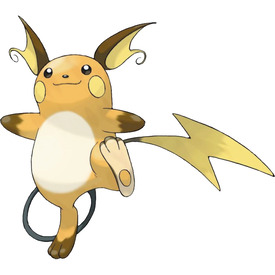

--------------------------------------------------
--------------------------------------------------
2
Electabuzz


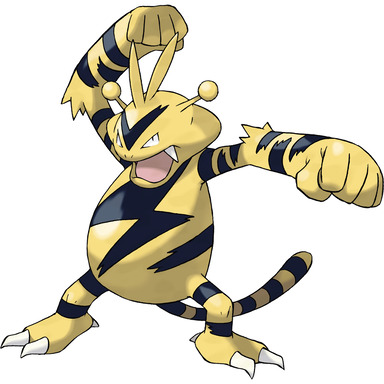

--------------------------------------------------
--------------------------------------------------
3
Magmar


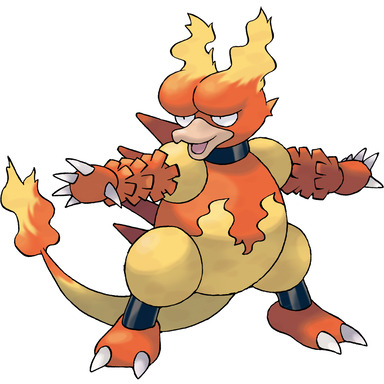

--------------------------------------------------
--------------------------------------------------
4
Rapidash


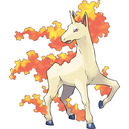

--------------------------------------------------
--------------------------------------------------
5
Sceptile


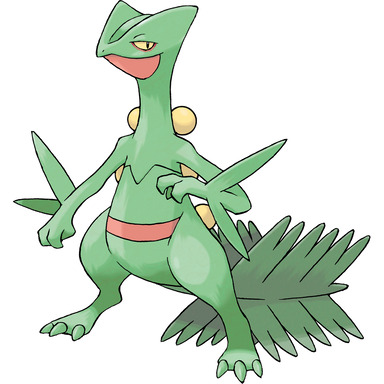

--------------------------------------------------


In [34]:
from IPython.display import Image

for n,p in enumerate(neighbors):
  index=p[0]
  print('-'*50)
  print(n+1)
  print(pokemon_rows[index][1])
  display(Image(f"resized/{pokemon_rows[index][0]}.jpg",width=150)),
  print('-'*50)